'回帰係数:'

array([1.56022048])

'切片:'

-15.22574059566955

決定係数: 0.2985138336694635


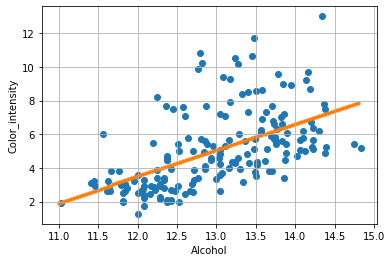

In [52]:
#AI-TECHGYM-N-16

import pandas as pd
import urllib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir('C:/Users/tsuchida/Documents/techgym_セミナー/TortoiseGit_resorce/techgym_ai/Chapter_0/Answer_sheet/AI_Chapter0_saved_files')

#線形単回帰
from sklearn import linear_model

#データの取得
data = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(data, header=None)

txt= "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names"
urllib.request.urlretrieve(txt, './wine.names')

#説明文の表示(必要であれば表示)
#f = open("./wine.names","r")
#for line in f:
#    print(line)
#f.close()

#indexを説明からつける
#アルコール,リンゴ酸,灰,灰分のアルカリ度,マグネシウム,総フェノール,フラバノイド
#非フラバノイドフェノール,プロアントシアニン,色の濃さ,色相,希釈ワインのOD 280 / OD 315,プロリン
columns_name = ['class','Alcohol','Malic_acid','Ash',
                'Alcalinity_of_ash','Magnesium','Total_phenols',
                'Flavanoids','Nonflavanoid_phenols','Proanthocyanins',
                'Color_intensity','Hue','OD280_OD315','Proline']
wine.columns = columns_name


# 線形回帰インスタンス
REG = linear_model.LinearRegression()

#説明変数
X = wine.loc[:,['Alcohol']].values

# 目的変数
Y = wine.loc[:,'Color_intensity'].values

# 予測モデルを計算、ここでa,bを算出
REG.fit(X, Y)
 
# 回帰係数
display('回帰係数:', REG.coef_)
# 切片 
display('切片:', REG.intercept_)

# 先ほどと同じ散布図
plt.scatter(wine['Alcohol'], wine['Color_intensity'])
plt.xlabel('Alcohol')
plt.ylabel('Color_intensity')

# その上に線形回帰直線を引く
x = np.linspace(11, 14.8, 100).reshape(-1, 1)
plt.scatter(x, REG.predict(x), s=10)
plt.grid(True)

# 決定係数
print('決定係数:', REG.score(X,Y))
